In [1]:
import torch.utils.data as Data
import torchvision
import torch
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('..')

In [3]:
from negaugment import OverlayNegativeSamples

In [4]:
def gaussian_noise(epsilon):
    transform_func = lambda x : (x + torch.randn_like(x)*epsilon)
    return torchvision.transforms.Lambda(transform_func)

cifar_stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

transform_train = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop(32, padding=4),
        torchvision.transforms.RandomRotation(degrees=10),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(*cifar_stats),
        gaussian_noise(0.5),
])
trainset = torchvision.datasets.CIFAR10(root='../cifar10', train=True, transform=transform_train)

In [5]:
train_loader = Data.DataLoader(dataset=trainset, batch_size=1000, shuffle=False)

In [6]:
imgs, labels = next(iter(train_loader))

In [12]:
def show_image(ax, imgs, i=None):
    i = i or np.random.randint(len(imgs))
    img = imgs[i].permute(1,2,0)
    means, stds = cifar_stats
    means = torch.tensor(means).reshape(1,1,3)
    stds = torch.tensor(stds).reshape(1,1,3)
    img_unnormalized = img * stds + means
    ax.imshow(img_unnormalized.clamp(0, 1))

In [13]:
def show_image_grid(imgs):
    n = 10
    _, axes = plt.subplots(n, n, figsize=(20, 20))
    for i in range(n):
        for j in range(n):
            show_image(axes[i][j], imgs)

# Augmented training images

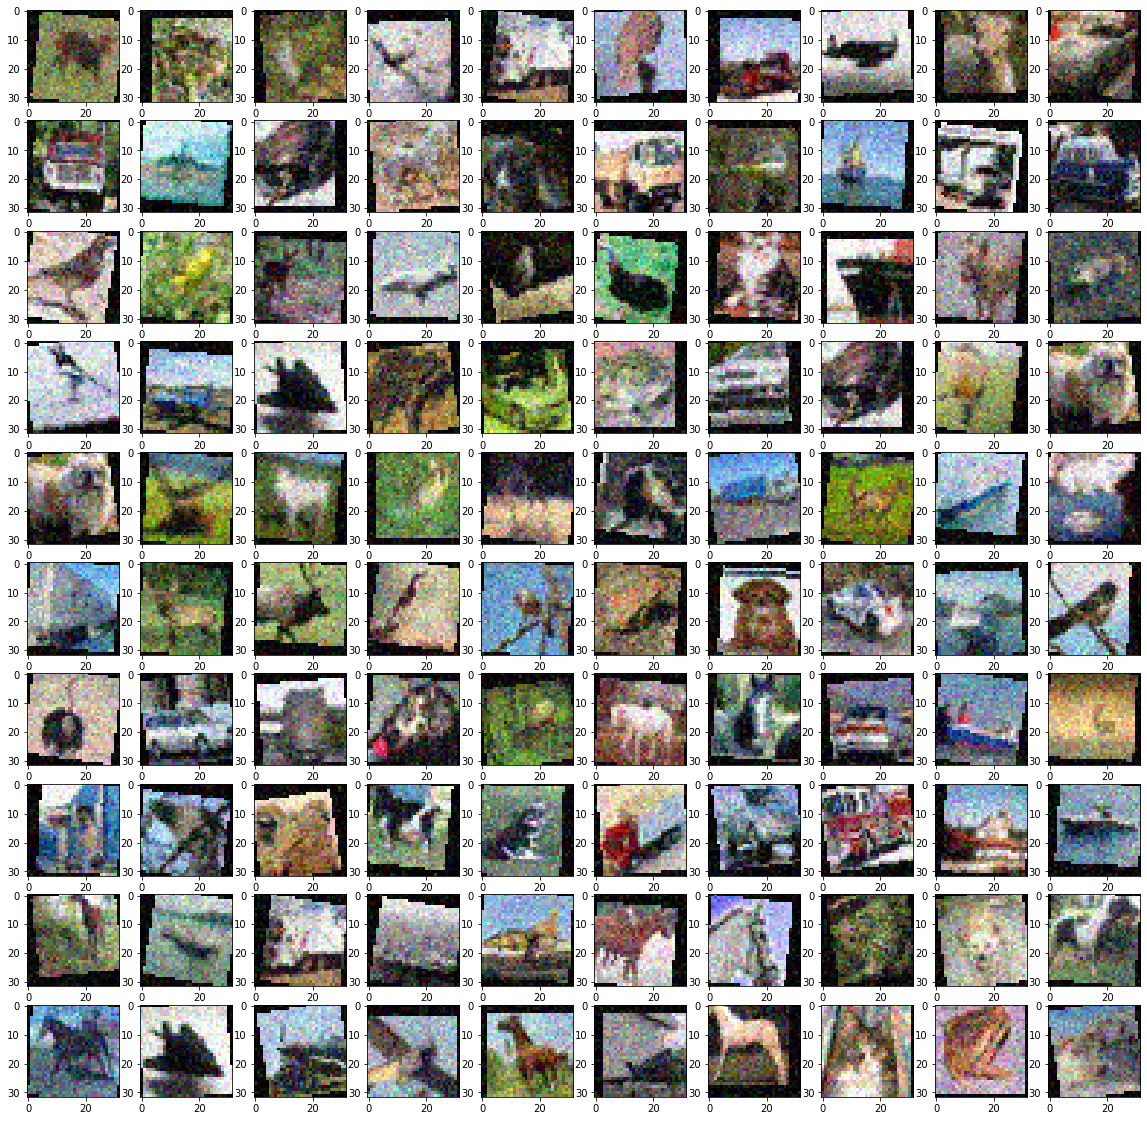

In [15]:
show_image_grid(imgs)

# Randomly sampled negative images

In [8]:
negative_example_func = OverlayNegativeSamples()

In [10]:
neg_imgs = negative_example_func(imgs, labels)

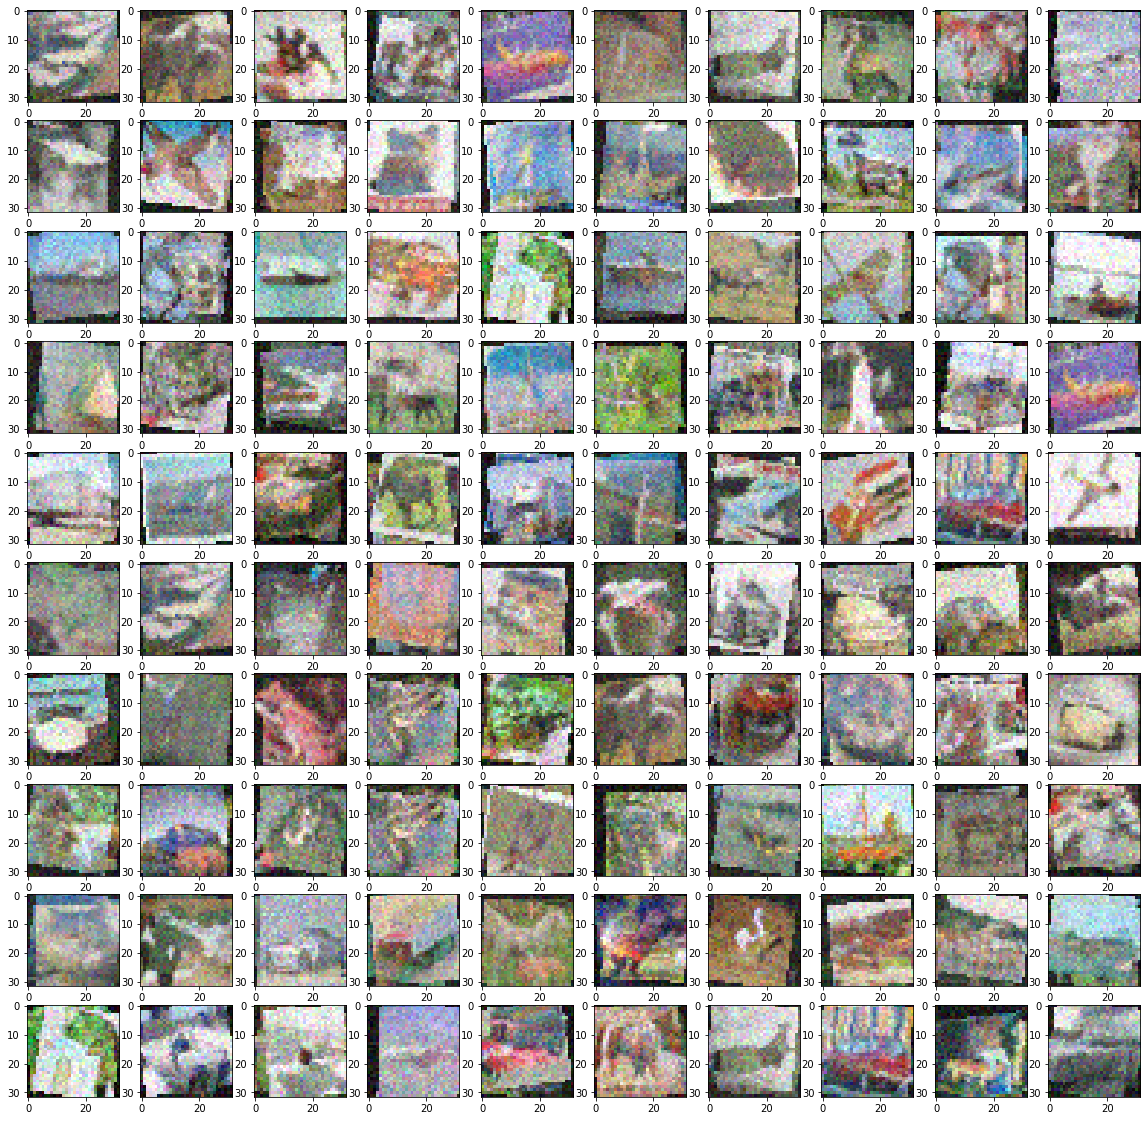

In [14]:
show_image_grid(neg_imgs)